In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pyranges as pr
import itertools
from collections import defaultdict
import os
import glob
import sys
sys.path.append("/Genomics/kocherlab/bjarnold/STARRseq/code/notebooks")
import functions as fn



In [2]:
data_dir = "MACS2_summaries"
suffix = "_MACS2_peaks_qval_0_folddiff_2.txt"

MACS_files = glob.glob(os.path.join(data_dir, "*"+suffix))
print(MACS_files)

['MACS2_summaries/Bimp_MACS2_peaks_qval_0_folddiff_2.txt', 'MACS2_summaries/Amel_MACS2_peaks_qval_0_folddiff_2.txt', 'MACS2_summaries/Lzep_MACS2_peaks_qval_0_folddiff_2.txt', 'MACS2_summaries/Lbal_MACS2_peaks_qval_0_folddiff_2.txt', 'MACS2_summaries/BimpMET_MACS2_peaks_qval_0_folddiff_2.txt', 'MACS2_summaries/Lvie_MACS2_peaks_qval_0_folddiff_2.txt', 'MACS2_summaries/Avir_MACS2_peaks_qval_0_folddiff_2.txt', 'MACS2_summaries/Hlig_MACS2_peaks_qval_0_folddiff_2.txt', 'MACS2_summaries/Hqua_MACS2_peaks_qval_0_folddiff_2.txt', 'MACS2_summaries/Nmel_MACS2_peaks_qval_0_folddiff_2.txt', 'MACS2_summaries/Apur_MACS2_peaks_qval_0_folddiff_2.txt', 'MACS2_summaries/BimpDMSO_MACS2_peaks_qval_0_folddiff_2.txt', 'MACS2_summaries/Aaur_MACS2_peaks_qval_0_folddiff_2.txt']


In [3]:
dfs = []
for f in MACS_files:
    df = pd.read_csv(f, sep=" ")
    dfs.append(df)
dfs


[  species    raw  dedup  Unnamed: 3
 0    Bimp  10842    558         NaN,
   species    raw  dedup  Unnamed: 3
 0    Amel  18597   6297         NaN,
   species    raw  dedup  Unnamed: 3
 0    Lzep  14293   1576         NaN,
   species    raw  dedup  Unnamed: 3
 0    Lbal  11567   3281         NaN,
    species    raw  dedup  Unnamed: 3
 0  BimpMET  11716    621         NaN,
   species    raw  dedup  Unnamed: 3
 0    Lvie  16263   1124         NaN,
   species    raw  dedup  Unnamed: 3
 0    Avir  19772   2212         NaN,
   species    raw  dedup  Unnamed: 3
 0    Hlig  19013   1271         NaN,
   species   raw  dedup  Unnamed: 3
 0    Hqua  1955   1151         NaN,
   species    raw  dedup  Unnamed: 3
 0    Nmel  10070   3776         NaN,
   species   raw  dedup  Unnamed: 3
 0    Apur  8412   1771         NaN,
     species    raw  dedup  Unnamed: 3
 0  BimpDMSO  12818    509         NaN,
   species   raw  dedup  Unnamed: 3
 0    Aaur  5026    413         NaN]

In [4]:
# concatenate all data dramfes in dfs
df = pd.concat(dfs)
df.reset_index(inplace=True, drop=True)
# sort by species column
df.sort_values(by=["species"], inplace=True)
df['ratio'] = df['dedup']/df['raw']
df


,species,raw,dedup,Unnamed: 3,ratio
12,Aaur,5026,413,NaN,0.082173
1,Amel,18597,6297,NaN,0.338603
10,Apur,8412,1771,NaN,0.210533
6,Avir,19772,2212,NaN,0.111875
0,Bimp,10842,558,NaN,0.051467
11,BimpDMSO,12818,509,NaN,0.039710
4,BimpMET,11716,621,NaN,0.053004
7,Hlig,19013,1271,NaN,0.066849
8,Hqua,1955,1151,NaN,0.588747
3,Lbal,11567,3281,NaN,0.283652


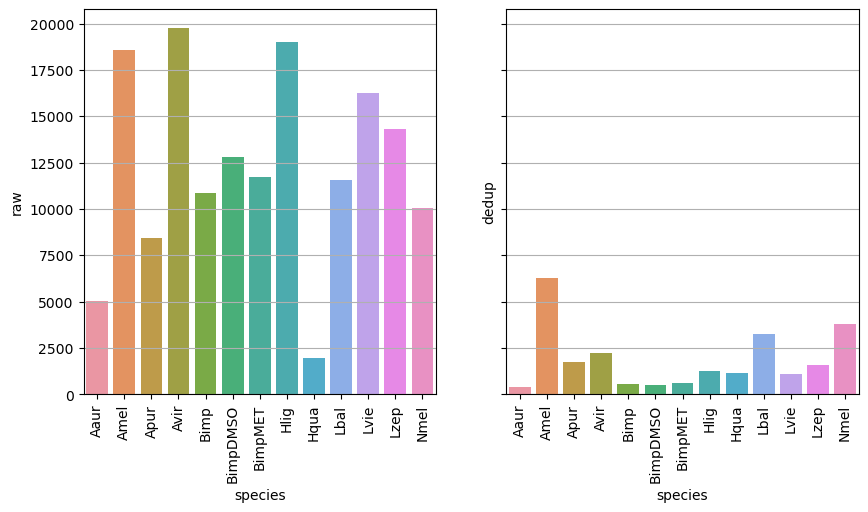

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.barplot(data=df, x="species", y="raw", ax = axs[0])
axs[0].yaxis.grid(True)
axs[0].tick_params(axis='x', rotation=90)

sns.barplot(data=df, x="species", y="dedup", ax = axs[1])
axs[1].yaxis.grid(True)
axs[1].tick_params(axis='x', rotation=90)


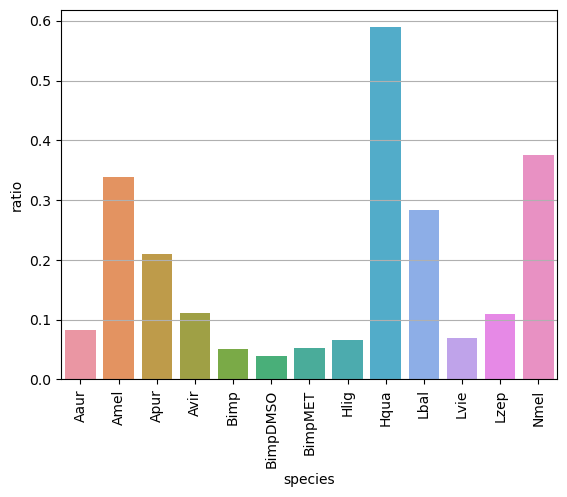

In [6]:
sns.barplot(data=df, x="species", y="ratio")
plt.xticks(rotation=90)
# add grid lines to y axis
plt.gca().yaxis.grid(True)

